#### Introduction
The Loan eligibility/prediction data set is a popular data set used in machine learning and data analysis. The dataset contains information about loan applicants and whether they were approved or not for a loan.
The data set include the following variable
1. Loan ID: Unique identifier for each loan
2. Gender: Gender of the applicant (Male/Female)
3. Married: Marital status of the applicant (Yes/No)
4. Dependents: Number of dependents the applicant has
5. Education: Education level of the applicant (Graduate/Not Graduate)
6. Self Employed: Whether the applicant is self-employed or not (Yes/No)
7. Applicant Income: Income of the applicant
8. Co-applicant Income: Income of the co-applicant
9.  Loan Amount: Loan amount applied for
10. Loan Amount Term: Term of the loan in months
11. Credit History: Credit history of the applicant (1=Good, 0=Bad)
12. Property Area: Location of the property (Rural/Semiurban/Urban)
13. Loan Status: Whether the loan was approved or not (Y=Yes, N=No)

#### Aims and Objectives
1. To build a predictive model to determine whether a loan applicantion will be approve or not
2. To build a model that best predict our target variable and get the accuracy of the model

>The target variable is "Loan Status", which is a binary variable indicating whether the loan was approved or not. The other variables can be used as predictors in the model.

In [320]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
sb.set_style("darkgrid")

1. load the dataset
2. check for missing values and inconsistencies in data set
3. Data Processing 
>Select the best feautures in the dataset

>split data set into training and testing 

4. Normalization
5. Fit the model
6. Evaluating 
7. Fine tunning 
8. Predict the test data set

#### Load Dataset

In [321]:
#load Dataset
loan_df=pd.read_csv('loan_data_set.csv')
# ln_df=loan_df.copy()
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [322]:
# assessing the data set
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [323]:
# check for percentage of null value
loan_df.isna().sum()/len(loan_df)*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

The Self_Employed and Credit_History columns has null value percentage greater than 5% 

#### Data Cleaning

In [324]:
#solving null values
for col in loan_df.columns:
    if col is loan_df['Self_Employed']:# fill null with mode of the column
        mode=loan_df[col].mode()
        loan_df[col]=loan_df[col].fillna(mode)
    elif col is loan_df['Credit_History']: # fill null with mean of the column
        mean=loan_df[col].mean()
        loan_df[col]=loan_df[col].fillna(mean)
    else:
        loan_df.dropna(inplace=True) # drop all null values with % less than 5

In [325]:
loan_df.drop(columns=['Loan_ID'], inplace=True)

In [326]:
# convert the target variable to numerical
loan_df['Loan_Status']=loan_df['Loan_Status'].map({'N':0,'Y':1})

In [327]:
cat_col=loan_df.select_dtypes('object').columns
cat_col

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')

In [328]:
# loan_df.drop(columns=['Loan_ID'], inplace=True)

#### Exploratory Data Analysis(EDA)

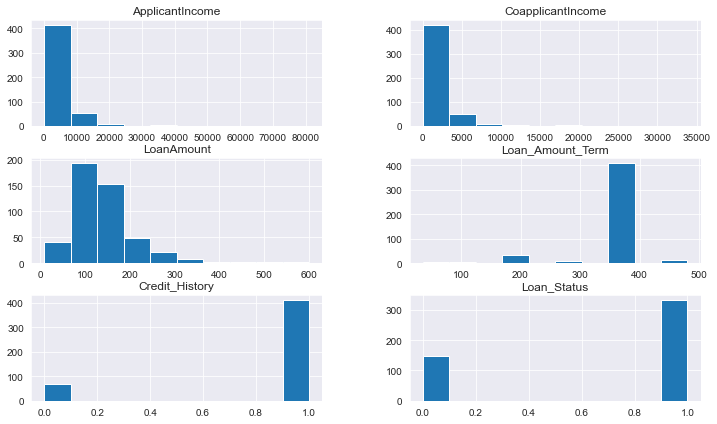

In [329]:
loan_df.hist(figsize=(12,7));

In [330]:
# LET CHECK FOR SKEWS COLUMNS
loan_df.skew().sort_values(ascending=False)

C:\Users\HP\AppData\Local\Temp\ipykernel_6732\2993579183.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  loan_df.skew().sort_values(ascending=False)


ApplicantIncome      6.917027
CoapplicantIncome    5.881622
LoanAmount           2.361437
Loan_Status         -0.832681
Credit_History      -2.013253
Loan_Amount_Term    -2.333710
dtype: float64

In [331]:
skew_col=['ApplicantIncome','CoapplicantIncome','LoanAmount'] # This three columns are skew in the data set

In [332]:
loan_df[skew_col]=np.log(loan_df[skew_col]+1) #apply np.log to normalize the columns

In [333]:
# Check for outliers columns
def outliers_check():
    col_store=[]
    
    for col in loan_df.select_dtypes('number'):
        q1=loan_df[col].quantile(.25)
        q3=loan_df[col].quantile(.75)
        
        iqr=q3-q1
        lower_out=(loan_df[col] < (q1-(1.5*iqr))).sum()
        upper_out=(loan_df[col] > (q3 + (1.5 *iqr))).sum()
        
        if lower_out > 0 or upper_out >0:
            col_store.append(col)
    return col_store

In [334]:
outlier_col=outliers_check()
outlier_col

['ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

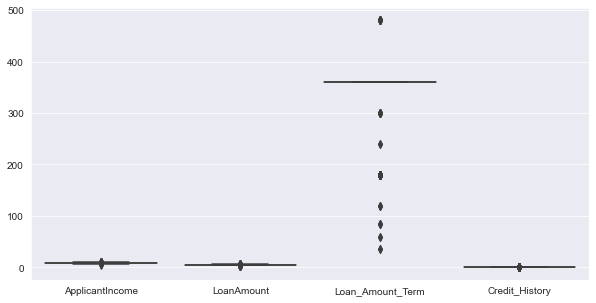

In [335]:
plt.figure(figsize=(10,5))
sb.boxplot(data=loan_df[outlier_col]);

'ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History' are the columns that contain ouliers, Loan amount term happens to have highest number of outliers

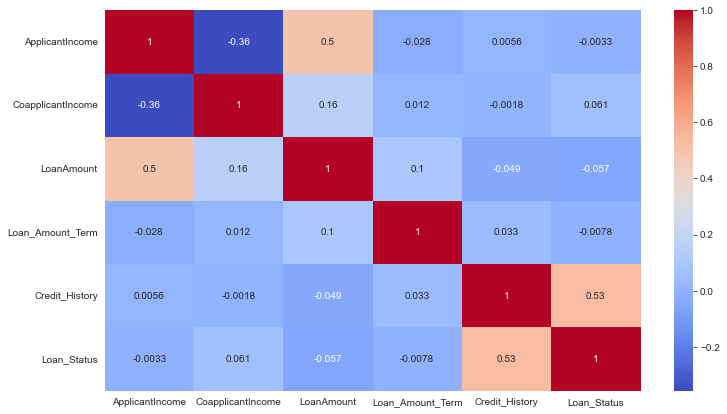

In [336]:
#let check for the relationship of other columns with the target variable
plt.figure(figsize=(12,7))
sb.heatmap(loan_df.corr(), cmap='coolwarm', annot=True);

From the figure above it is clearly seen that credit History contribute alot to the target variable with 0.53 correlation value

####  EDA Summary Report
While performing the exploratory  data analysis, 'ApplicantIncome','CoapplicantIncome' and 'LoanAmount' columns are mostly skewed which is later nomalized with np.log function, The ouliers columns include 'ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', Loan amount term columns contains more outliers compare to the other three columns
While checking for independent variable that mostly contribute to outcome of the terget variable credit history column play a vital role to determine whether a customer can access a loan or not

### Data Preprocessing
#### Selecting Best Features

In [337]:
#select numerical columns
num_col=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

let check all the variable that contribute to the target variable(both categorical and numerical)

In [338]:
ln=pd.get_dummies(loan_df,cat_col)
corr_col=ln.corr()['Loan_Status'].sort_values(ascending=False).index[1:7].to_list()
corr_col

['Credit_History',
 'Property_Area_Semiurban',
 'Married_Yes',
 'Dependents_2',
 'Education_Graduate',
 'Gender_Male']

'Credit_History','Property_Area_Semiurban','Married_Yes','Dependents_2','Education_Graduate','Gender_Male' are the independent variable That greatly contribute to the target or dependent variable

In [339]:
# change all cat columns to numerical
loan_label=loan_df['Loan_Status'] # target variable
ln_df=loan_df.copy()
loan_df.drop('Loan_Status',axis=1, inplace=True)
Data=loan_df.copy()

In [341]:
# #convertig categorical columns to numerical variable for training 
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# label_encoder=LabelEncoder()
# Data[cat_col]=Data[cat_col].apply(lambda col: label_encoder.fit_transform(col))

# #load One HotEncoder
# one_hot_en=OneHotEncoder()
# array_hot_en=one_hot_en.fit_transform(Data[cat_col])
# data_encoded= pd.DataFrame(array_hot_en,index=Data.index)
# other_col=Data.drop(columns=cat_col)
# data_df=pd.concat([data_encoded,other_col],axis=1)


In [342]:
loan_df=pd.get_dummies(loan_df,cat_col)

In [343]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

##### This class object normalize and fit the dataset for better modeling

In [383]:
class numerical_transform(BaseEstimator, TransformerMixin):
    
    def __init__(self,cat_col):
        
        self.cat_col=cat_col
    
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        
        X=pd.get_dummies(X, self.cat_col)
        return X

In [345]:
class best_fit(BaseEstimator, TransformerMixin):
    
    def __init__(self, N1, N2):
        self.N1=N1
        self.N2=N2
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X[self.N1]=StandardScaler().fit_transform(X[self.N1])
       
        return X[self.N2]

In [346]:
first_transform=numerical_transform(cat_col)
x=first_transform.transform(ln_df)

In [347]:
second_transform=best_fit(num_col,corr_col)
best_fit_data=second_transform.fit_transform(x)
best_fit_data

,Credit_History,Property_Area_Semiurban,Married_Yes,Dependents_2,Education_Graduate,Gender_Male
1,0.413197,0,1,0,1,1
2,0.413197,0,1,0,1,1
3,0.413197,0,1,0,0,1
4,0.413197,0,0,0,1,1
5,0.413197,0,1,1,1,1
...,...,...,...,...,...,...
609,0.413197,0,0,0,1,0
610,0.413197,0,1,0,1,1
611,0.413197,0,1,0,1,1
612,0.413197,0,1,1,1,1


In [348]:
# let build our pipeline

In [349]:
from sklearn.pipeline import Pipeline

In [350]:
pipeline_obj=Pipeline([('First_transform',numerical_transform(cat_col)), ('second_transform',best_fit(num_col,corr_col))])

#### Split data set

In [352]:
from sklearn.model_selection import train_test_split

In [353]:
X_train,X_test,Y_train,Y_test=train_test_split(Data, loan_label, random_state=True, test_size=.2, shuffle=True)

In [354]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((384, 11), (96, 11), (384,), (96,))

In [355]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
98,Male,Yes,0,Not Graduate,No,8.340217,0.000000,4.753590,180.0,1.0,Semiurban
306,Female,No,0,Graduate,No,8.232972,7.418781,4.912655,360.0,1.0,Rural
523,Male,Yes,2,Graduate,Yes,8.980801,8.877242,6.175867,360.0,1.0,Rural
521,Male,No,0,Graduate,No,7.824446,0.000000,4.025352,360.0,1.0,Semiurban
211,Male,Yes,3+,Graduate,No,8.140607,7.131699,4.859812,360.0,0.0,Semiurban
...,...,...,...,...,...,...,...,...,...,...,...
326,Male,No,0,Graduate,No,8.500657,0.000000,4.875197,360.0,0.0,Rural
91,Male,Yes,2,Graduate,No,8.740497,8.640295,5.241747,180.0,1.0,Semiurban
509,Female,No,1,Graduate,No,9.492733,0.000000,3.713572,360.0,1.0,Urban
297,Female,Yes,1,Graduate,No,8.448272,0.000000,4.912655,360.0,1.0,Urban


In [356]:
transform_train=pipeline_obj.fit_transform(X_train)

In [357]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [358]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [359]:
model=LogisticRegression()
model.fit(transform_train,Y_train)
first_ten_predict=model.predict(transform_train)

#first_ten_predict

In [360]:
m1_train= accuracy_score(first_ten_predict,Y_train)
m1_train

0.8255208333333334

In [361]:
# predict for the test data

In [362]:
transform_test=pipeline_obj.transform(X_test)
first_ten_test_pre=model.predict(transform_test)
#print prediction summary by target variable
print(classification_report(Y_test,first_ten_test_pre))

              precision    recall  f1-score   support

           0       0.90      0.27      0.42        33
           1       0.72      0.98      0.83        63

    accuracy                           0.74        96
   macro avg       0.81      0.63      0.63        96
weighted avg       0.78      0.74      0.69        96



In [363]:
c_m_l=confusion_matrix(y_true=Y_test, y_pred=first_ten_test_pre)
c_m_l

array([[ 9, 24],
       [ 1, 62]], dtype=int64)

In [364]:
m1_test= accuracy_score(first_ten_test_pre,Y_test)
print(f'Linear model is {round(m1_test,2)*100}% accurate')

Linear model is 74.0% accurate


###### Observations
The linear regression model is performing with 82% accuracy in the train data and 74% accuracy with the test data

In [365]:
model2=DecisionTreeClassifier()
model2.fit(transform_train,Y_train)
decision_pre=model2.predict(transform_train)

In [366]:
m2_train=accuracy_score(decision_pre,Y_train)
m2_train

0.8307291666666666

In [367]:
decision_test=pipeline_obj.transform(X_test)
predict_decision_test=model2.predict(decision_test)
print(classification_report(Y_test, predict_decision_test))
m2_test=accuracy_score(predict_decision_test, Y_test)
print(f"The decison tree model is {round(m2_test,2)*100}% accurate ")

              precision    recall  f1-score   support

           0       0.85      0.33      0.48        33
           1       0.73      0.97      0.84        63

    accuracy                           0.75        96
   macro avg       0.79      0.65      0.66        96
weighted avg       0.77      0.75      0.71        96

The decison tree model is 75.0% accurate 


In [368]:
c_m_d=confusion_matrix(y_true=Y_test, y_pred=predict_decision_test)
c_m_d

array([[11, 22],
       [ 2, 61]], dtype=int64)

###### Observations
The Decission Tree classifier model is performing with 83% accuracy in the train data and 75% accuracy with the test data

In [369]:
model3=RandomForestClassifier()
model3.fit(transform_train,Y_train)
random_pre=model3.predict(transform_train)

In [370]:
m3_train=accuracy_score(random_pre,Y_train)
m3_train

0.8307291666666666

In [371]:
random_test=pipeline_obj.transform(X_test)
predict_random_test=model3.predict(random_test)
print(classification_report(Y_test[:100], predict_random_test))
m3_test=accuracy_score(predict_random_test,Y_test)
print(f"The Random forest model is {round(m3_test,2)*100}% accurate")

              precision    recall  f1-score   support

           0       0.82      0.27      0.41        33
           1       0.72      0.97      0.82        63

    accuracy                           0.73        96
   macro avg       0.77      0.62      0.62        96
weighted avg       0.75      0.73      0.68        96

The Random forest model is 73.0% accurate


In [372]:
c_m_r=confusion_matrix(y_true=Y_test, y_pred=predict_random_test)
c_m_r

array([[ 9, 24],
       [ 2, 61]], dtype=int64)

###### Observations
The Random Forest model is performing with 83% accuracy in the train data and 74% accuracy with the test data

In [373]:
model4=XGBClassifier()
model4.fit(transform_train,Y_train)
xgb_pre=model4.predict(transform_train)

In [374]:
m4_train=accuracy_score(xgb_pre,Y_train)
m4_train

0.8255208333333334

In [375]:
xgb_test=pipeline_obj.transform(X_test)
predict_xgb_test=model4.predict(xgb_test)
print(classification_report(Y_test, predict_xgb_test))
m4_test=accuracy_score(predict_xgb_test,Y_test)
print(f"The XGB model is {round(m4_test,2)*100}% accurate")

              precision    recall  f1-score   support

           0       0.90      0.27      0.42        33
           1       0.72      0.98      0.83        63

    accuracy                           0.74        96
   macro avg       0.81      0.63      0.63        96
weighted avg       0.78      0.74      0.69        96

The XGB model is 74.0% accurate


In [376]:
c_m_x=confusion_matrix(y_true=Y_test, y_pred=predict_xgb_test)
c_m_x

array([[ 9, 24],
       [ 1, 62]], dtype=int64)

###### Observations
The XGBclassifier model is performing with 82% accuracy in the train data and 74% accuracy with the test data

In [377]:
train_score=[m1_train,m2_train,m3_train,m4_train]
test_score=[m1_test,m2_test,m3_test,m4_test]
model_df=pd.DataFrame({'Model':['Linear Regression','Decision Tree','Random Forest','XGB'],
                      'Train_Accuracy':train_score,
                      'Test_Accuracy':test_score})
model_df.sort_values(by='Test_Accuracy', ascending=False)

,Model,Train_Accuracy,Test_Accuracy
1,Decision Tree,0.830729,0.750000
0,Linear Regression,0.825521,0.739583
3,XGB,0.825521,0.739583
2,Random Forest,0.830729,0.729167


#### Conclusion:
1. The best model that is suitable for predicting if customer to be given loan or not is DecisionTreeClassifier, this is as a reults of its performance on both train and test data which is 87% and 75% respectively
2. The Credit History is very important variable that contribute to the prediction due to it high positive correlation value with the target variable loan_status which is 0.53

In [378]:
DecisionTreeClassifier?

In [242]:
GridSearchCV?

In [379]:
from sklearn.model_selection import GridSearchCV

In [380]:
splitter=['best']
min_samples_split=[4,6,8]
min_samples_leaf=[3,5,7]
max_features=[None]

In [381]:
param_grid= {'splitter':splitter,'min_samples_split':min_samples_split
            , 'min_samples_leaf':min_samples_leaf,'max_features':max_features}

In [382]:
grid_model=GridSearchCV(model2,param_grid=param_grid,scoring='accuracy', cv=3)

In [202]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
98,Male,Yes,0,Not Graduate,No,8.340217,0.000000,4.753590,180.0,1.0,Semiurban
306,Female,No,0,Graduate,No,8.232972,7.418781,4.912655,360.0,1.0,Rural
523,Male,Yes,2,Graduate,Yes,8.980801,8.877242,6.175867,360.0,1.0,Rural
521,Male,No,0,Graduate,No,7.824446,0.000000,4.025352,360.0,1.0,Semiurban
211,Male,Yes,3+,Graduate,No,8.140607,7.131699,4.859812,360.0,0.0,Semiurban
...,...,...,...,...,...,...,...,...,...,...,...
326,Male,No,0,Graduate,No,8.500657,0.000000,4.875197,360.0,0.0,Rural
91,Male,Yes,2,Graduate,No,8.740497,8.640295,5.241747,180.0,1.0,Semiurban
509,Female,No,1,Graduate,No,9.492733,0.000000,3.713572,360.0,1.0,Urban
297,Female,Yes,1,Graduate,No,8.448272,0.000000,4.912655,360.0,1.0,Urban
